### Importing all the libraries needed.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Reading the image that will be used and converting it to gray using the cv.COLOR_BGR2GRAY function.

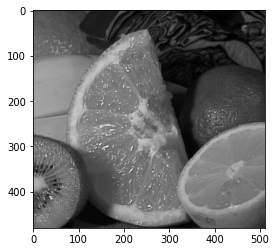

In [2]:
image_base = cv.imread('fruits.png')
image_gray = cv.cvtColor(image_base, cv.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.show()

## 1. Noise Reduction
Applying Gaussian Blur to the image is one technique to smooth it out and get rid of the noise. Thus, to reduce the noise here, I am going to use cv2 GaussianBlur() function with a 5x5 Kernel. The smaller the kernel, the more less visible the blur.


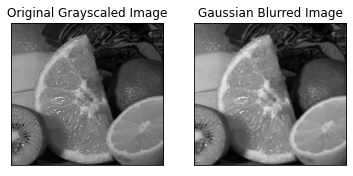

In [3]:
gaussian_image = cv.GaussianBlur(image_gray, (5, 5), 1.4)

images = [image_gray, gaussian_image]
images_desc = ["Original Grayscaled Image", "Gaussian Blurred Image"]

for i, (img, des) in enumerate(zip(images, images_desc)):
  plt.subplot(1, 2, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(des)
  plt.xticks([])
  plt.yticks([])
plt.show()

## 2. Gradient Calculation
When the color of an image changes, the intensity of the pixel also changes, forming an edge. This step detects the intensity and direction of an edge. Using Sobel Filters, we can detect the intensity change in both x and y directions. The next step is to calculate the magnitude (using the np.hypot() function) and slope (using the arctan() function)

In [4]:
def Normalize(img):
  img = img/np.max(img)
  return img

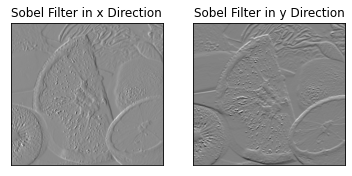

In [5]:
sobel_x = cv.Sobel(gaussian_image, cv.CV_64F, 1, 0)
sobel_y = cv.Sobel(gaussian_image, cv.CV_64F, 0, 1)
sobel_x = Normalize(sobel_x)
sobel_y = Normalize(sobel_y)

sobels = [sobel_x, sobel_y]
sobels_desc = ["Sobel Filter in x Direction", "Sobel Filter in y Direction"]

for i, (img, des) in enumerate(zip(sobels, sobels_desc)):
  plt.subplot(1, 2, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(des)
  plt.xticks([])
  plt.yticks([])
plt.show()

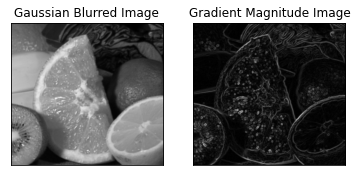

In [6]:
gradient_magnitude = np.hypot(sobel_x, sobel_y)
gradient_magnitude = Normalize(gradient_magnitude)

imgs = [gaussian_image, gradient_magnitude]
imgs_desc = ["Gaussian Blurred Image", "Gradient Magnitude Image"]

for i, (img, des) in enumerate(zip(imgs, imgs_desc)):
  plt.subplot(1, 2, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(des)
  plt.xticks([])
  plt.yticks([])
plt.show()

In [7]:
gradient = np.degrees(np.arctan2(sobel_x, sobel_y))

## 3. Non-Maximum Supression
To convert the thick edges into thin edges, we must perform Non-Maximum Supression. If the pixel that we are checking has a higher intensity than the ones in the same direction, we keep the pixel, but if it has a lower intensity, we set the pixel to 0 and pick the one with the higher intensity.

In [8]:
def NonMaxSupression(Gmag, Grad, sobel_x, sobel_y):
  NMS = np.zeros(Gmag.shape)
  for i in range(1, int(Gmag.shape[0]) - 1):
    for j in range(1, int(Gmag.shape[1]) - 1):
      if((Grad[i,j] >= 0 and Grad[i,j] <= 45) or (Grad[i,j] < -135 and Grad[i,j] >= -180)):
        yBot = np.array([Gmag[i,j+1], Gmag[i+1,j+1]])
        yTop = np.array([Gmag[i,j-1], Gmag[i-1,j-1]])
        x_est = np.absolute(sobel_y[i,j]/Gmag[i,j])
        if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
          NMS[i,j] = Gmag[i,j]  
        else:
          NMS[i,j] = 0
          
      if((Grad[i,j] > 45 and Grad[i,j] <= 90) or (Grad[i,j] < -90 and Grad[i,j] >= -135)):
        yBot = np.array([Gmag[i+1,j] ,Gmag[i+1,j+1]])
        yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j-1]])
        x_est = np.absolute(sobel_x[i,j]/Gmag[i,j])
        if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
          NMS[i,j] = Gmag[i,j]
        else:
          NMS[i,j] = 0
          
      if((Grad[i,j] > 90 and Grad[i,j] <= 135) or (Grad[i,j] < -45 and Grad[i,j] >= -90)):
        yBot = np.array([Gmag[i+1,j] ,Gmag[i+1,j-1]])
        yTop = np.array([Gmag[i-1,j] ,Gmag[i-1,j+1]])
        x_est = np.absolute(sobel_x[i,j]/Gmag[i,j])
        if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
          NMS[i,j] = Gmag[i,j]
        else:
          NMS[i,j] = 0
          
      if((Grad[i,j] > 135 and Grad[i,j] <= 180) or (Grad[i,j] < 0 and Grad[i,j] >= -45)):
        yBot = np.array([Gmag[i,j-1] ,Gmag[i+1,j-1]])
        yTop = np.array([Gmag[i,j+1] ,Gmag[i-1,j+1]])
        x_est = np.absolute(sobel_y[i,j]/Gmag[i,j])
        if (Gmag[i,j] >= ((yBot[1]-yBot[0])*x_est+yBot[0]) and Gmag[i,j] >= ((yTop[1]-yTop[0])*x_est+yTop[0])):
          NMS[i,j] = Gmag[i,j]
        else:
          NMS[i,j] = 0
          
  return NMS

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


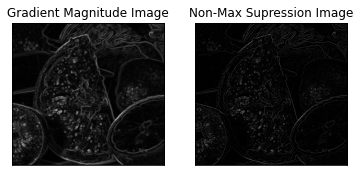

In [9]:
nms = NonMaxSupression(gradient_magnitude, gradient, sobel_x, sobel_y)
nms = Normalize(nms)

nms_imgs = [gradient_magnitude, nms]
nms_imgs_desc = ["Gradient Magnitude Image", "Non-Max Supression Image"]

for i, (img, des) in enumerate(zip(nms_imgs, nms_imgs_desc)):
  plt.subplot(1, 2, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(des)
  plt.xticks([])
  plt.yticks([])
plt.show()

## Double Threshold
This step helps us identify 3 kinds of pixel: strong, weak, and non-relevant. Strong pixels are those with such a high intensity that we can be certain they contribute to the final edge. Weak pixels are those with an intensity value that isn't high enough to be called strong, but not low enough to be regarded irrelevant for edge detection. Pixels other than that are non-relevant.

To find the strong pixels, a high threshold is employed and the non-relevant pixels are identified using low threshold. The pixels between the high and low threshold are marked as weak and will be taken care of in the last step.

In [10]:
def threshold(img, low=0.05, high=0.09):
  highThreshold = img.max() * high
  lowThreshold = highThreshold * low

  X, Y = img.shape
  result = np.zeros((X, Y), dtype=np.int32)

  weak = np.int32(25)
  strong = np.int32(255)

  strong_i, strong_j = np.where(img >= highThreshold)
  zeros_i, zeros_j = np.where(img < lowThreshold)
  weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))

  result[strong_i, strong_j] = strong
  result[weak_i, weak_j] = weak

  return result

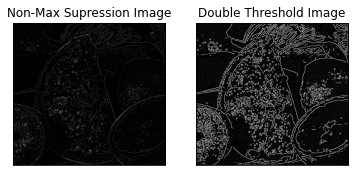

In [11]:
doThreshImage = threshold(nms)

thresh_imgs = [nms, doThreshImage]
thresh_imgs_desc = ["Non-Max Supression Image", "Double Threshold Image"]

for i, (img, des) in enumerate(zip(thresh_imgs, thresh_imgs_desc)):
  plt.subplot(1, 2, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(des)
  plt.xticks([])
  plt.yticks([])
plt.show()

## 5. Edge Tracking by Hysteresis
From the step below, we had marked many pixels as weak. Now in this step we need to determine whether that weak pixel should be considered as an edge or not. If that pixel is not connected with a strong pixel then we let that be a weak pixel (aka set it as 0) and if it's connected with a strong pixel then it's considered as a strong edge.

In [12]:
def hysteresis(img, weak=25, strong=255):
  X, Y = img.shape
  for i in range(1, X-1):
    for j in range(1, Y-1):
      if(img[i, j] == weak):
        try:
          if((img[i+1, j-1] == strong) or (img[i+1, j] == strong) or (img[i+1, j+1] == strong) or (img[i, j-1] == strong) or (img[i, j+1] == strong) or (img[i-1, j-1] == strong) or (img[i-1, j] == strong) or (img[i-1, j+1] == strong)):
            img[i, j] = strong
            
          else:
            img[i, j] = 0
        except IndexError as e:
          pass
            
  return img

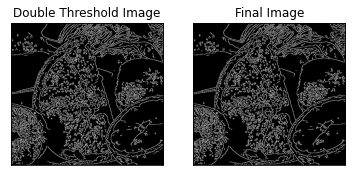

In [13]:
final_image = hysteresis(doThreshImage)

final_imgs = [doThreshImage, final_image]
final_imgs_desc = ["Double Threshold Image", "Final Image"]

for i, (img, des) in enumerate(zip(final_imgs, final_imgs_desc)):
  plt.subplot(1, 2, i+1)
  plt.imshow(img, cmap='gray')
  plt.title(des)
  plt.xticks([])
  plt.yticks([])
plt.show()

### References: 
### https://github.com/MadhavEsDios/Canny-Edge-Detector/blob/master/Canny%20Edge%20Detector.ipynb
### https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
### http://www.justin-liang.com/tutorials/canny/#suppression